In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
import multiprocessing

In [2]:
import sys,os
sys.path.append(os.path.abspath("../../"))
from preprocessing.Normalize import Normalize
import helper.SeriesHelper as series_helper

In [3]:
initial_data = Normalize().get_normalized_data()

In [4]:
initial_data.head()

.382233  0.434896   
GSM107076  0.376363  0.470676    0.277529  0.389187  0.331418  0.481197   

GEO_ACC    40149_at  40189_at  40225_at  40255_at  40273_at  40284_at  \
GSM107072  0.344302  0.141771  0.107078  0.439504  0.338891  0.356270   
GSM107073  0.424049  0.124379  0.113877  0.428810  0.439972  0.521266   
GSM107074  0.432748  0.125643  0.138083  0.361721  0.473654  0.382121   
GSM107075  0.450231  0.211813  0.182672  0.390877  0.468863  0.232361   
GSM107076  0.406065  0.095328  0.077947  0.414755  0.427295  0.357789   

GEO_ACC    40359_at  40420_at  40446_at  40465_at  40472_at  40489_at  \
GSM107072  0.302105  0.307301  0.114051  0.398818  0.421107  0.425436   
GSM107073  0.329681  0.338912  0.016680  0.400845  0.140737  0.457242   
GSM107074  0.307398  0.289734  0.156313  0.319019  0.141799  0.579162   
GSM107075  0.337408  0.358732  0.212595  0.406601  0.479836  0.399795   
GSM107076  0.281620  0.317747  0.147533  0.362560  0.207230  0.438549   

GEO_ACC    40524_at  40560_at  40562_at  40569_at  40612_at  40640_at  \
GSM107072  0.543856  0.240118  0.394056  0.189089  0.427821  0.412955   
GSM107073  0.521923  0.062655  0.338422  0.208331  0.447430  0.506701   
GSM107074  0.557228  0.085451  0.364489  0.263039  0.548780  0.361219   
GSM107075  0.584980  0.388300  0.411546  0.240972  0.461714  0.377960   
GSM107076  0.510629  0.102545  0.332526  0.258073  0.420936  0.385974   

GEO_ACC    40665_at  40687_at  40829_at  40837_at  40850_at  41037_at  \
GSM107072  0.378955  0.382556  0.233843  0.406672  0.232423  0.350097   
GSM107073  0.376376  0.285357  0.336387  0.340336  0.487567  0.423711   
GSM107074  0.350909  0.249752  0.349095  0.406862  0.606963  0.326304   
GSM107075  0.413264  0.434920  0.360919  0.396621  0.394602  0.340710   
GSM107076  0.432076  0.374540  0.264911  0.378953  0.237495  0.340665   

GEO_ACC    41047_at  41113_at  41160_at  41220_at  41329_at  41386_i_at  \
GSM107072  0.253692  0.386655  0.102427  0.204943  0.323746    0.356541   
GSM107073  0.292052  0.465638  0.134235  0.353366  0.366902    0.395762   
GSM107074  0.188338  0.468564  0.205325  0.217302  0.348065    0.414883   
GSM107075  0.264246  0.403868  0.158337  0.210719  0.416712    0.410456   
GSM107076  0.212871  0.429730  0.141053  0.223289  0.323971    0.385642   

GEO_ACC    41387_r_at  41397_at  41469_at  41512_at  41553_at  41577_at  \
GSM107072    0.444705  0.293456  0.232448  0.485777  0.536389  0.188915   
GSM107073    0.453992  0.463464  0.264599  0.499907  0.602512  0.228053   
GSM107074    0.427111  0.408415  0.279531  0.469495  0.618096  0.142412   
GSM107075    0.503533  0.448901  0.283420  0.494806  0.642650  0.330033   
GSM107076    0.458682  0.538148  0.234182  0.433494  0.622607  0.224836   

GEO_ACC    41644_at  41657_at  41660_at  41856_at  41858_at  42361_g_at  \
GSM107072  0.200861  0.346516  0.414898  0.261171  0.261060    0.277842   
GSM107073  0.364047  0.362880  0.469523  0.208019  0.375357    0.343418   
GSM107074  0.199382  0.414770  0.522537  0.304355  0.189857    0.257827   
GSM107075  0.441759  0.349975  0.395500  0.275237  0.286899    0.377995   
GSM107076  0.333846  0.376028  0.480772  0.306611  0.270144    0.369836   

GEO_ACC    43427_at  43511_s_at  43544_at  43934_at  43977_at  44040_at  \
GSM107072  0.318782    0.168577  0.397690  0.407031  0.219517  0.358460   
GSM107073  0.298281    0.198035  0.453011  0.614534  0.262894  0.405346   
GSM107074  0.357898    0.235616  0.346483  0.608628  0.208405  0.428646   
GSM107075  0.444223    0.271838  0.373423  0.419358  0.253364  0.348733   
GSM107076  0.409442    0.275924  0.337870  0.459239  0.241652  0.401934   

GEO_ACC    44065_at  44111_at  44120_at  44146_at  44563_at  44617_at  \
GSM107072  0.369626  0.398362  0.275617  0.166012  0.307514  0.423397   
GSM107073  0.395286  0.482331  0.334243  0.233018  0.309019  0.482058   
GSM107074  0.343588  0.363685  0.239150  0.213386  0.299171  0.429604   
GSM107075  0.331898  0.461737  0.259251  0.295458  

In [5]:
for column in initial_data.columns:
    if "Unnamed" in column:
        initial_data.drop(column, axis = 1, inplace=True)

In [6]:
initial_data.head()

.382233  0.434896   
GSM107076  0.376363  0.470676    0.277529  0.389187  0.331418  0.481197   

GEO_ACC    40149_at  40189_at  40225_at  40255_at  40273_at  40284_at  \
GSM107072  0.344302  0.141771  0.107078  0.439504  0.338891  0.356270   
GSM107073  0.424049  0.124379  0.113877  0.428810  0.439972  0.521266   
GSM107074  0.432748  0.125643  0.138083  0.361721  0.473654  0.382121   
GSM107075  0.450231  0.211813  0.182672  0.390877  0.468863  0.232361   
GSM107076  0.406065  0.095328  0.077947  0.414755  0.427295  0.357789   

GEO_ACC    40359_at  40420_at  40446_at  40465_at  40472_at  40489_at  \
GSM107072  0.302105  0.307301  0.114051  0.398818  0.421107  0.425436   
GSM107073  0.329681  0.338912  0.016680  0.400845  0.140737  0.457242   
GSM107074  0.307398  0.289734  0.156313  0.319019  0.141799  0.579162   
GSM107075  0.337408  0.358732  0.212595  0.406601  0.479836  0.399795   
GSM107076  0.281620  0.317747  0.147533  0.362560  0.207230  0.438549   

GEO_ACC    40524_at  40560_at  40562_at  40569_at  40612_at  40640_at  \
GSM107072  0.543856  0.240118  0.394056  0.189089  0.427821  0.412955   
GSM107073  0.521923  0.062655  0.338422  0.208331  0.447430  0.506701   
GSM107074  0.557228  0.085451  0.364489  0.263039  0.548780  0.361219   
GSM107075  0.584980  0.388300  0.411546  0.240972  0.461714  0.377960   
GSM107076  0.510629  0.102545  0.332526  0.258073  0.420936  0.385974   

GEO_ACC    40665_at  40687_at  40829_at  40837_at  40850_at  41037_at  \
GSM107072  0.378955  0.382556  0.233843  0.406672  0.232423  0.350097   
GSM107073  0.376376  0.285357  0.336387  0.340336  0.487567  0.423711   
GSM107074  0.350909  0.249752  0.349095  0.406862  0.606963  0.326304   
GSM107075  0.413264  0.434920  0.360919  0.396621  0.394602  0.340710   
GSM107076  0.432076  0.374540  0.264911  0.378953  0.237495  0.340665   

GEO_ACC    41047_at  41113_at  41160_at  41220_at  41329_at  41386_i_at  \
GSM107072  0.253692  0.386655  0.102427  0.204943  0.323746    0.356541   
GSM107073  0.292052  0.465638  0.134235  0.353366  0.366902    0.395762   
GSM107074  0.188338  0.468564  0.205325  0.217302  0.348065    0.414883   
GSM107075  0.264246  0.403868  0.158337  0.210719  0.416712    0.410456   
GSM107076  0.212871  0.429730  0.141053  0.223289  0.323971    0.385642   

GEO_ACC    41387_r_at  41397_at  41469_at  41512_at  41553_at  41577_at  \
GSM107072    0.444705  0.293456  0.232448  0.485777  0.536389  0.188915   
GSM107073    0.453992  0.463464  0.264599  0.499907  0.602512  0.228053   
GSM107074    0.427111  0.408415  0.279531  0.469495  0.618096  0.142412   
GSM107075    0.503533  0.448901  0.283420  0.494806  0.642650  0.330033   
GSM107076    0.458682  0.538148  0.234182  0.433494  0.622607  0.224836   

GEO_ACC    41644_at  41657_at  41660_at  41856_at  41858_at  42361_g_at  \
GSM107072  0.200861  0.346516  0.414898  0.261171  0.261060    0.277842   
GSM107073  0.364047  0.362880  0.469523  0.208019  0.375357    0.343418   
GSM107074  0.199382  0.414770  0.522537  0.304355  0.189857    0.257827   
GSM107075  0.441759  0.349975  0.395500  0.275237  0.286899    0.377995   
GSM107076  0.333846  0.376028  0.480772  0.306611  0.270144    0.369836   

GEO_ACC    43427_at  43511_s_at  43544_at  43934_at  43977_at  44040_at  \
GSM107072  0.318782    0.168577  0.397690  0.407031  0.219517  0.358460   
GSM107073  0.298281    0.198035  0.453011  0.614534  0.262894  0.405346   
GSM107074  0.357898    0.235616  0.346483  0.608628  0.208405  0.428646   
GSM107075  0.444223    0.271838  0.373423  0.419358  0.253364  0.348733   
GSM107076  0.409442    0.275924  0.337870  0.459239  0.241652  0.401934   

GEO_ACC    44065_at  44111_at  44120_at  44146_at  44563_at  44617_at  \
GSM107072  0.369626  0.398362  0.275617  0.166012  0.307514  0.423397   
GSM107073  0.395286  0.482331  0.334243  0.233018  0.309019  0.482058   
GSM107074  0.343588  0.363685  0.239150  0.213386  0.299171  0.429604   
GSM107075  0.331898  0.461737  0.259251  0.295458  

In [7]:
X = initial_data.to_numpy()

y = series_helper.get_relapse_value_from_series_matrix(initial_data)

In [8]:
col_labels = initial_data.columns
col_labels

Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       '90610_at', '91580_at', '91617_at', '91682_at', '91684_g_at',
       '91703_at', '91816_f_at', '91826_at', '91920_at', '91952_at'],
      dtype='object', name='GEO_ACC', length=22215)

In [9]:
for c in col_labels:
    no_missing = initial_data[c].isnull().sum()
    if no_missing > 0:
        print(c)
        print(no_missing)
    # else:
        # print(c)
        # print("No missing values")
        # print(' ')

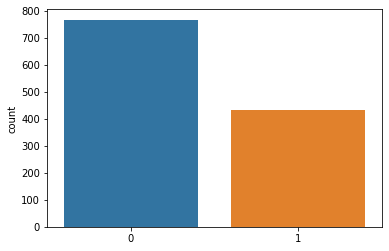

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y,label="Sum")

plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

In [12]:
correlation_matrix = pd.read_csv("correlation.csv")

In [14]:

def worker(col_beg,col_end,correlation_matrix,return_list):
    '''worker function'''
    correlated_features = set()
    for i in range(col_beg,col_end,1):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.8:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    return_list.append(correlated_features)


if __name__ == '__main__':
    manager = multiprocessing.Manager()
    return_list = manager.list()
    jobs = []
    step = 5000
    for i in range(0,len(correlation_matrix.columns),step):
        p = multiprocessing.Process(target=worker, args=(i,i+step,correlation_matrix,return_list))
        jobs.append(p)
        p.start()

    for proc in jobs:
        proc.join()
    print(return_list)

OSError: [Errno 22] Invalid argument

In [0]:
correlated_features

In [0]:

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)